In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
data = pd.read_csv("./gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2290 non-null   object 
 1   SPX           2290 non-null   float64
 2   GLD           2290 non-null   float64
 3   USO           2290 non-null   float64
 4   SLV           2290 non-null   float64
 5   EUR/USD       2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [46]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [47]:
data.dtypes

Date             object
SPX             float64
GLD             float64
USO             float64
SLV             float64
EUR/USD         float64
dtype: object

In [48]:
data.drop_duplicates()
len(data)

2290

In [49]:
data.isnull().sum()

Date            0
SPX             0
GLD             0
USO             0
SLV             0
EUR/USD         0
dtype: int64

In [50]:
data.columns = data.columns.str.strip()

In [51]:
data['Date'] = data['Date'].str.strip()


In [52]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Date'] = data['Date'].astype('int64') 
data['Date'] = data['Date'].astype('float64')


In [53]:
data.dtypes

Date       float64
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [54]:
x = data.drop(["GLD", "Date"], axis=1)
y= data["GLD"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train);

In [58]:
y_pred = model.predict(X_test)


In [59]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [60]:
print(f"mae =", mae)
print(f"mse =", mse)
print(f"rmse =", rmse)
print(f"r2 =", r2)

mae = 5.895826363968276
mse = 61.272887680360576
rmse = 7.827700024934564
r2 = 0.8848192096639602


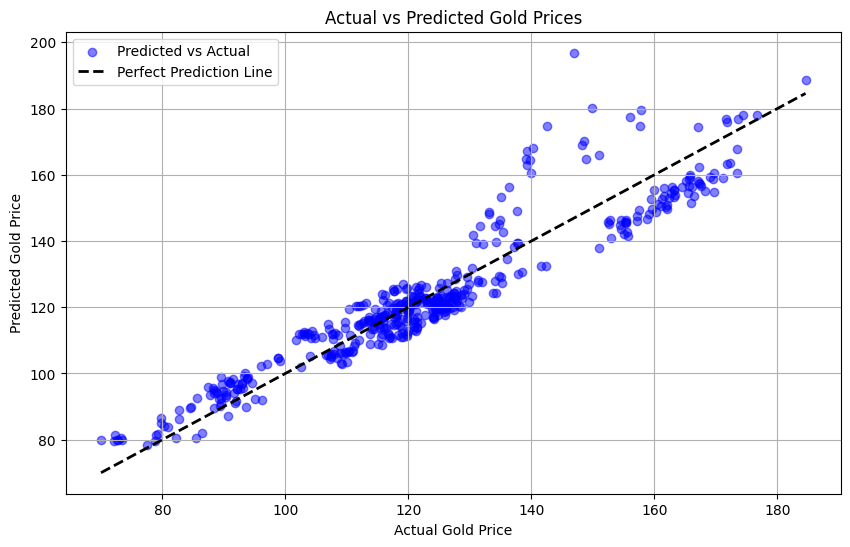

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Gold Price')
plt.ylabel('Predicted Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
spx = float(input("Enter SPX value: "))
uso = float(input("Enter USO value: "))
slv = float(input("Enter SLV value: "))
eur_usd = float(input("Enter EUR/USD value: "))

input_data = np.array([[spx, uso, slv, eur_usd]])
input_data = scaler.transform(input_data)
prediction = model.predict(input_data)

print("Predicted Gold Price:", prediction)

Predicted Gold Price: [95.79618807]


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
